### NLTK

In [1]:
import nltk
# nltk.download('punkt')
# nltk.download('punkt_tab')

text = "In Brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America"

from nltk.tokenize import word_tokenize
token = word_tokenize(text)
token

['In',
 'Brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [2]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'Brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [3]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1

[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('Brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

<Axes: xlabel='Key'>

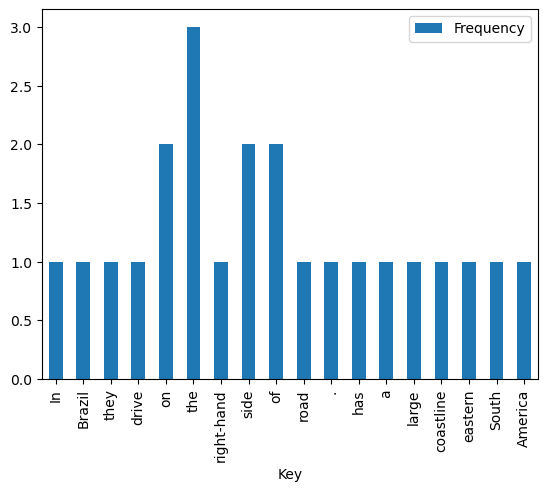

In [4]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(fdist, orient = 'index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

In [5]:
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download('stopwords')
a = set(stopwords.words('english'))
text = "Christiano Ronaldo was born on February 5, 1985, in Funchai, Madeira, Portugal"

text1 = word_tokenize(text.lower())

stopwords = [x for x in text1 if x not in a]
print(stopwords)


['christiano', 'ronaldo', 'born', 'february', '5', ',', '1985', ',', 'funchai', ',', 'madeira', ',', 'portugal']


In [6]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to Multiply my provision, saying tHat without crYing'
print('Sentence:', S)

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names =['Lancaster', 'Porter', 'Snowball']
for stemmer_name, stem in zip(names, stemmer_list):
    if stemmer_name == 'Snowball':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name, ':', ''.join(st.stem(s) for s in S.split()))

Sentence: presumably I would like to Multiply my provision, saying tHat without crYing
Lancaster : presumiwouldliktomultiplymyprovision,saythatwithoutcry
Porter : presumiwouldliketomultiplimyprovision,saythatwithoutcri
Snowball : presumiwouldliketomultiplimyprovision,saythatwithoutcri


In [7]:
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

print("rocks: ", lemmatizer.lemmatize("rocks"))
print("corpora: ", lemmatizer.lemmatize("corpora"))

rocks:  rock
corpora:  corpus


In [8]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
S = 'I am currently learning NLP in English, but if possible I want to know NLP in Indonesia language too'

tokens = word_tokenize(S)
print(pos_tag(tokens))

[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesia', 'NNP'), ('language', 'NN'), ('too', 'RB')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### TextBlob

In [9]:
from textblob import TextBlob

T = "Hello, Mr. Man. He smiled! This, i.e. that, is it."
sentence_tokens = TextBlob(T).sentences

print(sentence_tokens)

ModuleNotFoundError: No module named 'textblob'

In [10]:
from textblob import Word
print("Stem: ", Word('running').stem())

print("Lemmatize: ", Word('went').lemmatize('v'))

Stem:  run
Lemmatize:  go


In [11]:
# nltk.download('averaged_perceptron_tagger_eng')
for word, pos in TextBlob(T).tags:
    print(word, pos, end=',')

Hello NNP,Mr. NNP,Man NNP,He PRP,smiled VBD,This DT,i.e NN,that DT,is VBZ,it PRP,

### Sastrawi

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"
stop = stopword.remove(kalimat.lower())
print(stop)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

I = "Perayaan itu berbarengan dengan saat kita bepergian ke Makassar"
print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakan"))

raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


<function matplotlib.pyplot.show(close=None, block=None)>

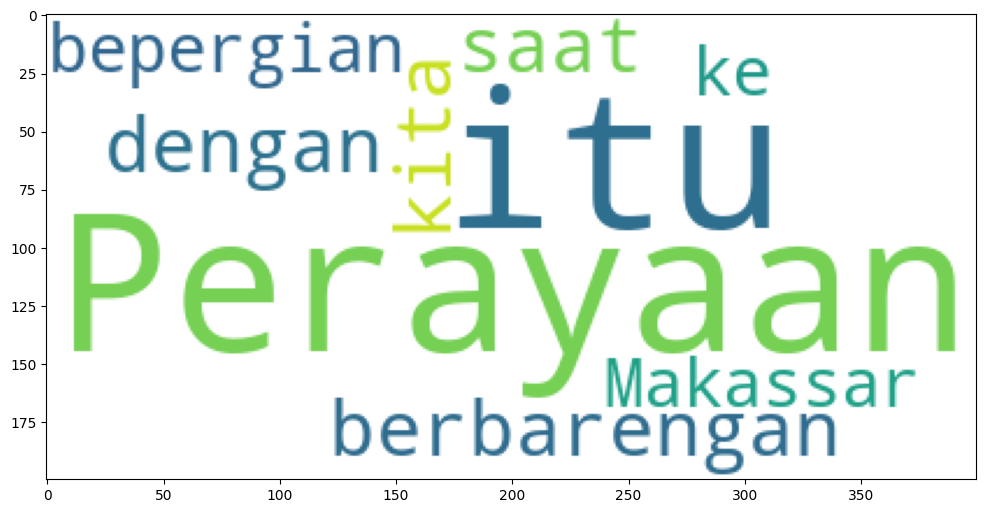

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white").generate(I)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.show

### Clustering

#### 1. K-Means

In [ ]:
import pickle
import os
import re
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

src_name = "20newsgroup.pckl"
with open(src_name, 'rb') as fin:
    data = pickle.load(fin)

docs = [doc for doc in data.data]
label = data.target

def preprocess(doc):
    sents = word_tokenize(doc)
    sents_tok = list() # tokenisasi kalimat
    sents = [t for t in sents if t not in stop_words]
    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line
        s = s.replace("\n", " ") # menggantikan \n dengan spasi
        s = re.sub('[^a-zA-Z0-9 ]', '', s) # menghapus simbol
        s = re.sub('\s+', ' ', s) # menghapus repetitive space
        sents_tok.append(s)
    return " ".join(sents_tok)

docs_clear = list()
for d in docs:
    docs_clear.append(preprocess(d))

print('DONE!')

FileNotFoundError: [Errno 2] No such file or directory: '20newsgroup.pckl'

In [26]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print(X.shape)
k = 3
seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya tetap sama
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, random_state = seed)
km.fit(X)

# Hasil clusteringnya
C_km = km.predict(X)
C_km[:10]

(1653, 10597)


array([2, 1, 2, 1, 1, 1, 1, 2, 1, 1])

#### 2. K-Means++

In [27]:
kmpp = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state=seed)
kmpp.fit(X)
C_kmpp = kmpp.predict(X)
C_kmpp[:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1])

#### 3. DB Scan

In [28]:
import numpy as np

dbscan = cluster.DBSCAN(eps=0.5)
dbscan.fit(X)
C_db = dbscan.labels_.astype(int)
C_db[:10]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

#### Evaluasi internal (Silhouette Coefficient)

In [29]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km, C_kmpp, C_db]

for res in C:
    print(siluet(X,res), end=', ')

# NOTE: Silhouette coefficient hanya cocok untuk k-means

0.01616220287590532, 0.016186458735992972, -0.2366693363098658, 

#### Evaluasi Eksternal (Purity)

In [30]:
from sklearn.metrics.cluster import homogeneity_score as purity

for res in C:
    print(purity(label,res), end=', ')

0.2382133361509104, 0.2427817517761241, 0.0015549989772357536, 

#### Evaluasi NMI

In [31]:
# Evaluasi eksternal NMI
from sklearn.metrics import normalized_mutual_info_score as NMI

for res in C:
    print(NMI(label,res), end=', ')

0.2990163005470323, 0.30284764551448057, 0.002704356633566744, 

#### Tugas Praktikum

##### 1. Membersihkan noise

In [32]:
import re
def clean_text(text):
    text = re.sub(r"\[.*?\]", "", text)
    text = text.replace("\n", " ")
    text = re.sub(r"\s+", " ", text).strip()
    return text

#### Crawling

In [ ]:
from bs4 import BeautifulSoup
import requests 

headers = {"User-Agent": "Mozilla/5.0"}
base = "https://id.wikipedia.org"
url = base + "/wiki/Daftar_topik_keuangan"

soup = BeautifulSoup(requests.get(url, headers=headers).text, "html.parser")

links = [base + a["href"] for a in soup.select("div.mw-parser-output ul li a") 
         if "redlink=1" not in a.get("href", "")][:10]

for i in links:
    print(i)

documents = []

for i, link in enumerate(links, 1):
    s = BeautifulSoup(requests.get(link, headers=headers).text, "html.parser")
    
    for sup in s.find_all("sup", class_="reference"):
        sup.decompose()
    
    paras = [clean_text(p.get_text()) for p in s.find_all("p") if p.get_text().strip()]
    full_text = " ".join(paras)
    documents.append(full_text)

https://id.wikipedia.org/wiki/Akrual
https://id.wikipedia.org/wiki/Aset
https://id.wikipedia.org/wiki/Aset_lancar
https://id.wikipedia.org/wiki/Aset_tidak_lancar
https://id.wikipedia.org/wiki/Aset_tetap
https://id.wikipedia.org/wiki/Aset_takberwujud
https://id.wikipedia.org/wiki/Akun
https://id.wikipedia.org/wiki/Akuntansi_biaya
https://id.wikipedia.org/wiki/Akuntansi_forensik
https://id.wikipedia.org/wiki/Akuntansi_manajemen


#### Prepo

In [35]:
stop_id = set(stopwords.words('indonesian'))

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_id]
    tokens = [stemmer.stem(t) for t in tokens]
    return " ".join(tokens)

clean_docs = [preprocess(doc) for doc in documents]

#### Wordcloud

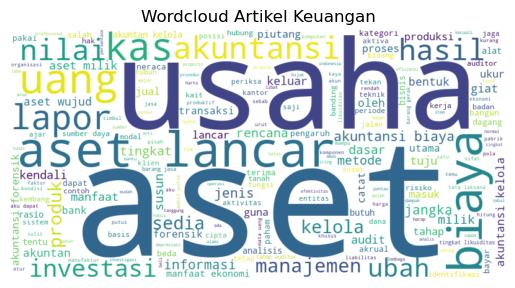

In [38]:
from collections import Counter
all_tokens = " ".join(clean_docs).split()

wc = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_tokens))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud Artikel Keuangan")
plt.show()

#### Barchart

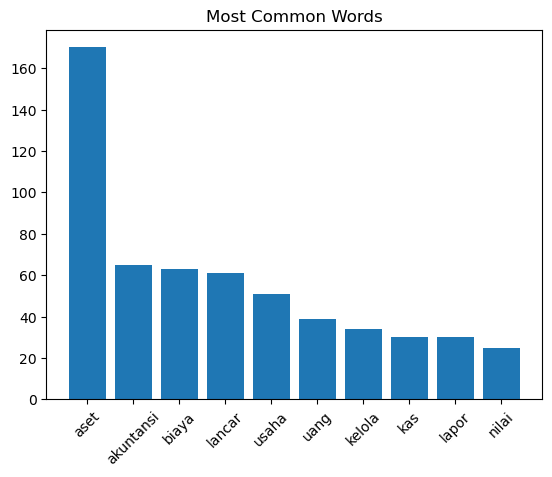

In [37]:
counts = Counter(all_tokens).most_common(10)
words, freq = zip(*counts)
plt.bar(words, freq)
plt.xticks(rotation=45)
plt.title("Most Common Words")
plt.show()